In [2]:
# This line will add a button to toggle visibility of code blocks,
# for use with the HTML export version
from IPython.core.display import HTML
HTML('''<button style="margin:0 auto; display: block;" onclick="jQuery('.code_cell .input_area').toggle();
    jQuery('.prompt').toggle();">Toggle code</button>''')

<img src="./Images/UoE_Horizontal_Logo_282_v1_160215.png" alt="drawing" width="600"/>

# Week 10 - Clustering
__Dr. David Elliott__

6. [Preprocessing](#pre)

7. [Data Exploration and Segmentation](#expseg)

8. [Semi-Supervised Learning](#semi)

9. [Strengths and Limitations](#adv_lim)

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pandas as pd

__Notes__
- Clustering has a vast range of use cases, of which are few are going to touch on a few explored in this lecture/notebook.

# 6. Preprocessing <a id='pre'></a>

## Dimensionality Reduction<sup>2</sup>

One clustered, we can measure the _affinity_ of each instance with its cluster (how well it fits in the cluster).

Cluster affinities can be used as features (e.g. a $K$ dimensional vector), often leading to a reduced feature space than the feature vector - but still preserving some information.

### Example: Image Classification<sup>2</sup>

The simple MNIST-like dataset availble in Sklearn is a common classification example.

__Notes__
- The example contains 1,797 grayscale 8×8 images representing digits 0 to 9.
- The example below clusters the training set into 50 clusters and replace the images with their distances to the 50 clusters
- As $k$ here is a preprocessing step in a classification pipeline you can use search for the "optimal" value of $k$

In [4]:
# From https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

# initial logistic regression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)

print("Logistic Regression Accuracy: %.2f"%round(log_reg_score*100,2)+"%")

# K-Means preprocessing
# cluster the training set first
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)
pipeline_score = pipeline.score(X_test, y_test)
print("KMeans and Logistic Regression Accuracy: %.2f"%round(pipeline_score*100,2)+"%")

Logistic Regression Accuracy: 96.89%
KMeans and Logistic Regression Accuracy: 97.78%


# 7. Data Exploration and Segmentation <a id='expseg'></a>

## Data Exploration

Clustering is useful for when we are looking for new patterns in data.

It maybe we want to cluster our data into groups, and analyze each cluster separately.

### Example: Cancer Research<sup>1</sup>

A researcher might assay gene expression levels in patients with breast cancer. 

They might look for subgroups among the breast cancer samples, or among the genes, in order to obtain a better understanding of the disease.

__Notes__

- _"For instance, suppose that we have a set of n observations, each with p features. The n observations could correspond to tissue samples for patients with breast cancer, and the p features could correspond to measurements collected for each tissue sample; these could be clinical measurements, such as tumor stage or grade, or they could be gene expression measurements. We may have a reason to believe that there is some heterogeneity among the n tissue samples; for instance, perhaps there are a few different unknown subtypes of breast cancer. Clustering could be used to find these subgroups. This is an unsupervised problem because we are trying to discover structure—in this case, distinct clusters—on the basis of a data set."_<sup>1</sup>

## Recommender Systems

In a very general sense, recommender systems are algorithms aimed at suggesting relevant items to users (e.g. movies, text, products, ect.)<sup>3</sup>.

### Example: Customer Segmentation<sup>2</sup>
    
You can cluster your customers based on their purchases and website activity.

It is useful to know who your customers are you can adapt products and marketing campaigns.

__Notes__
- An online shopping site might try to identify groups of shoppers with similar browsing and purchase histories, and items of particular interest to the these shoppers. Then an individual shopper can be preferentially shown the items in which he or she is particularly likely to be interested, based on the purchase histories of similar shoppers<sup>1</sup>.
- For hierarchical models the choice of dissimilarity measure here is very important, as it has a strong effect on the resulting dendrogram. For instance, the type of dissimilarity measure that should be used to cluster the shoppers depends on the goal. If Euclidean distance is used, then shoppers who have bought very few items overall (i.e. infrequent users of the online shopping site) will be clustered together. If correlation-based distance is used, then shoppers with similar preferences (e.g. shoppers who have bought items A and B but never items C or D) will be clustered together, even if some shoppers with these preferences are higher-volume shoppers than others<sup>1</sup>.
    - This will also be effected by whether the variables are scaled to have standard deviation one before the dissimilarity between the observations is computed. For example, some items may be purchased more frequently than others; for instance, a shopper might buy ten pairs of socks a year, but a computer very rarely. High-frequency purchases like socks therefore tend to have a much larger effect on the inter-shopper dissimilarities, and hence on the clustering ultimately obtained, than rare purchases like computers. This may not be desirable<sup>1</sup>. 
    - We might also want to scale the variables to have standard deviation one if they are measured on different scales; otherwise, the choice of units (e.g. centimeters versus kilometers) for a particular variable will greatly affect the dissimilarity measure obtained. 
    - The issue of whether or not to scale the variables before performing clustering applies to K-means clustering as well<sup>1</sup>.
- If your interested in trying this out, [this data set](https://archive.ics.uci.edu/ml/datasets/online+retail) may be useful.
    - Two example projects using this data:
    - https://www.kaggle.com/hellbuoy/online-retail-k-means-hierarchical-clustering
    - https://www.kaggle.com/tklimonova/online-retail-cohort-and-rfm-analysis

__TODO__
- Started making a demo of above but may not have time to finish
- Have a look through some examples on kaggle which use the netflix data?

In [5]:
retail = pd.read_excel('../Data/OnlineRetail.xlsx', header=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# Drop rows that have missing values
retail = retail.dropna()
# drop duplicates
#retail.drop_duplicates(keep='first', inplace=True)
# Changing the datatype of Customer Id as per Business understanding
retail['CustomerID'] = retail['CustomerID'].astype(str)

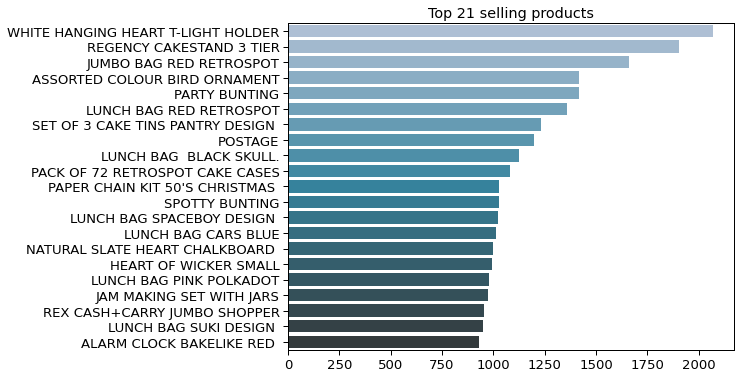

In [8]:
import seaborn as sns

# https://www.kaggle.com/tklimonova/online-retail-cohort-and-rfm-analysis

# Let's visualize some top products from the whole range
top_products = retail['Description'].value_counts()[:21]
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values, 
           palette='PuBuGn_d')
plt.title("Top 21 selling products")
plt.show()

In [9]:
# I'll drop postage as that doesnt seem like an item
top_products_l = list(top_products.index)
top_products_l.remove('POSTAGE')
retail_reduced = retail[retail.Description.isin(top_products_l)]
retail_reduced['Spending'] = retail_reduced['Quantity']*retail_reduced['UnitPrice']
retail_reduced = retail_reduced[['Description', 'CustomerID', 'Spending']]
retail_reduced = retail_reduced.groupby(['CustomerID', 'Description']).sum()
retail_reduced = retail_reduced.reset_index()
retail_reduced

<ipython-input-9-a1b397834df7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_reduced['Spending'] = retail_reduced['Quantity']*retail_reduced['UnitPrice']


,CustomerID,Description,Spending
0,12347.0,ALARM CLOCK BAKELIKE RED,135.00
1,12347.0,REGENCY CAKESTAND 3 TIER,191.25
2,12349.0,JAM MAKING SET WITH JARS,25.50
3,12349.0,REGENCY CAKESTAND 3 TIER,12.75
4,12349.0,SET OF 3 CAKE TINS PANTRY DESIGN,14.85
...,...,...,...
11640,18283.0,PACK OF 72 RETROSPOT CAKE CASES,5.50
11641,18283.0,PAPER CHAIN KIT 50'S CHRISTMAS,11.80
11642,18283.0,SET OF 3 CAKE TINS PANTRY DESIGN,4.95
11643,18283.0,SPOTTY BUNTING,4.95


In [10]:
# Todo: maybe change this to quantity rather than money spent

retail_pivot = retail_reduced.pivot(index='CustomerID', columns='Description')
retail_pivot = retail_pivot.fillna(0)
retail_pivot

Spending                                \
Description ALARM CLOCK BAKELIKE RED  ASSORTED COLOUR BIRD ORNAMENT   
CustomerID                                                            
12347.0                         135.0                          0.00   
12349.0                           0.0                          0.00   
12352.0                           0.0                          0.00   
12354.0                           0.0                          0.00   
12355.0                           0.0                          0.00   
...                               ...                           ...   
18277.0                           0.0                         13.52   
18278.0                          15.0                          0.00   
18280.0                          15.0                          0.00   
18282.0                           0.0                          0.00   
18283.0                           0.0                          0.00   

                                                            \
Description HEART OF WICKER SMALL JAM MAKING SET WITH JARS   
CustomerID                                                   
12347.0                      0.00                     0.00   
12349.0                      0.00                    25.50   
12352.0                      0.00                     0.00   
12354.0                      0.00                     0.00   
12355.0                      0.00                     0.00   
...                           ...                      ...   
18277.0                      0.00                     0.00   
18278.0                      0.00                     0.00   
18280.0                      0.00                     0.00   
18282.0                      0.00                     0.00   
18283.0                      1.65                     4.25   

                                                             \
Description JUMBO BAG RED RETROSPOT LUNCH BAG  BLACK SKULL.   
CustomerID                                                    
12347.0                         0.0                    0.00   
12349.0                         0.0                    0.00   
12352.0                         0.0                    0.00   
12354.0                         0.0                    0.00   
12355.0                         0.0                    0.00   
...                             ...                     ...   
18277.0                         0.0                    0.00   
18278.0                         0.0                    0.00   
18280.0                         0.0                    0.00   
18282.0                         0.0                    0.00   
18283.0                        35.1                   34.65   

                                                         \
Description LUNCH BAG CARS BLUE LUNCH BAG PINK POLKADOT   
CustomerID                                                
12347.0                     0.0                    0.00   
12349.0                     0.0                    0.00   
12352.0                     0.0                    0.00   
12354.0                     0.0                   16.50   
12355.0                     0.0                    0.00   
...                         ...                     ...   
18277.0                     0.0                    0.00   
18278.0                     0.0                    0.00   
18280.0                     0.0                    0.00   
18282.0                     0.0                    0.00   
18283.0                    16.5                   31.35   

                                                                \
Description LUNCH BAG RED RETROSPOT LUNCH BAG SPACEBOY DESIGN    
CustomerID                                                       
12347.0                         0.0                       0.00   
12349.0                         0.0                       0.00   
12352.0                         0.0                       0.00   
12354.0                        16.5                       0

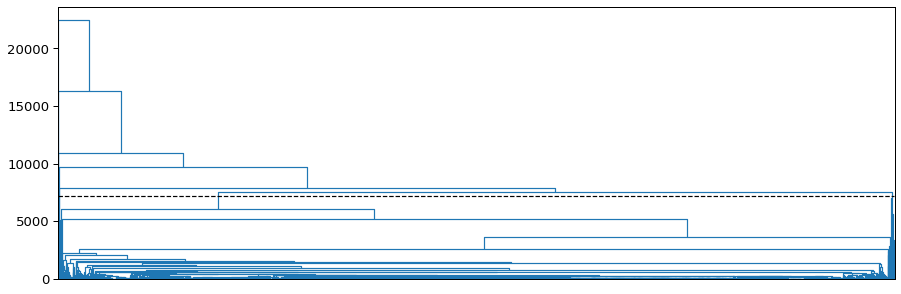

In [11]:
from scipy.cluster import hierarchy
fig, axes = plt.subplots(figsize=(15,5))
cluster = hierarchy.dendrogram(hierarchy.complete(retail_pivot), ax= axes, color_threshold=0)
axes.get_xaxis().set_ticks([])
plt.hlines(7200, xmin=0., xmax=pd.DataFrame(cluster['icoord']).max().max(), 
                   colors ='k', linestyles = 'dashed')
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering

### Extra Example: Search Recommendations<sup>1,2</sup>

A search engine might choose what search results to display to a particular individual based on the click histories of other individuals with similar search patterns.

Some search engines allow you to search for images similar to a reference image.

__Notes__

- You may first build a clustering algorithm to images in a database, then similar images end in similar clusters allowing you to return images from the same cluster.<sup>2</sup>

## Image Segmentation

An image can be segmented in a number of different ways:

- Semantic Segmentation
    - All pixels part of the same _object type_ get assigned to the same segment
- Instance Segmentation
    - All pixels part of the same _object_ get assigned to the same segment

## Example: Color Segmentation

By clustering pixels acording to color, then replacing each pixel with the mean cluster color, you can reduce the number of colors in an image<sup>2</sup>.

This is used in many object detection and tracking systems as contours of objects become more defined<sup>2</sup>.

__Notes__

- An example of Semantic Segmentation would be that for a self-driving cars vision system, all pixels belonging to pedestrians are clustered<sup>2</sup>.
- An example of Instance Segmentation is that there would be a separate cluster for each individual pedestrian<sup>2</sup>.
- Semantic and Instance Segmentation is typically done using convolutional neural networks.
- Another example of Color Segmentation is the use of satellite images to measure total forest area.

In [13]:
import os

image_dir = os.path.join(os.getcwd(),"Images")
from matplotlib.image import imread

# read in the image
image = imread(os.path.join(image_dir, "ladybug.png"))
# the first dimension is the height, second is width, third is number of color channels (RGB)
image.shape

(533, 800, 3)

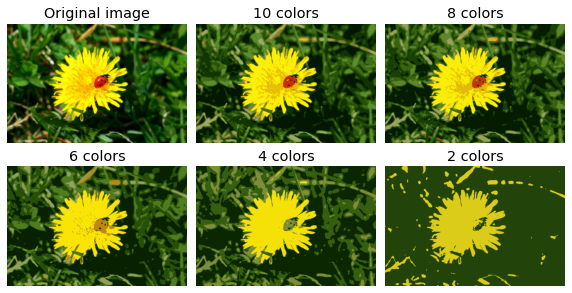

In [14]:
# From https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

__Notes__
- In the color segmentation example above, we are using the k-means centers to replace the clusters color.
- K-means prefers similar sized clusters, which is why the ladybugs red color dissapears below 8 colors.

# 8. Semi-Supervised Learning

Semi-supervised learning is used in the case where we have lots of unlabelled examples, and few labeled cases (common).

## Example: Building an MNIST-like Dataset<sup>2</sup>

Returning to the MNIST-like dataset, we got 96.89% accuracy on a test set (25% of the full data) when we trained a logistic regression using the rest (75%).

Imagine we only had our test set that we have gone through and labeled, and now need to label our training set.

Instead of labelling all 1347 instances manually, we could start by training a k-means algorithm and just manually labeling instances closest to the centeroid for each cluster.

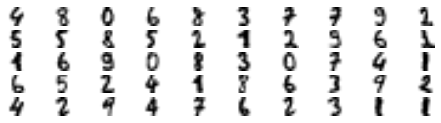

In [15]:
## https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [16]:
y_representative_digits = np.array([
     4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 
     5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 
     1, 6, 9, 0, 8, 3, 0, 7, 4, 1, 
     6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 
     4, 2, 9, 4, 7, 6, 2, 3, 1, 1])
#y_representative_digits = y_train[representative_digit_idx]
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
score = log_reg.score(X_test, y_test)
print("KMeans 50 Labels and Logistic Regression Accuracy: %.2f"%round(score*100,2)+"%")

KMeans 50 Labels and Logistic Regression Accuracy: 92.22%


__Notes__

- A classifier where we only had to label 50 observations instead of the 1347 in the previous training set getting ~5% less accuracy is pretty good.

We could further improve performance by using these labels we made to automatically label a percentage of the observations close to the centeroid.

In [18]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
y_train_partially_propagated = y_train_propagated[partially_propagated]

label_acc = np.mean(y_train_partially_propagated == y_train[partially_propagated])

print("Propogated Label Accuracy: %.2f"%round(label_acc*100,2)+"%")

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

score = log_reg.score(X_test, y_test)

print("Propogated KMeans and Logistic Regression Accuracy: %.2f"%round(score*100,2)+"%")

Propogated Label Accuracy: 97.51%
Propogated KMeans and Logistic Regression Accuracy: 93.56%


__Active Learning__<sup>2</sup>

To continue improving this model above is we could use active learning, where human experts provide labels for specific instances when requested by the algorithm.

A strategy for this is _uncertainty sampling_:
    
1. A model trains using labeled instances and makes predictions on unlabelled instance
2. The instances where the model is the most uncertain (e.g. using probabilities), is given an expert label.
3. You iterate the above process until performance improvement stops being worth the labelling effort.

Other strategies include:
- Labeling instances that will result in the most model change,
- Result in the largest drop in validation error,
- Instances where different models (e.g. SVM or Random Forest) disagree the most.

# 9. Strengths and Limitations <a id='adv_lim'></a>

## K-Means

### Advantages
- k-means generally has linear computational complexity regarding the number of instances, $n$, number of clusters, $k$, and the number of dimensions $d$.
    - This is only true when there is a clustering structure.
    - K-Means is generally one of the fastest clustering algorithms.
    
- Clustering methods generally are not very robust to perturbations to the data<sup>1</sup>.

__Notes__

- Perturbation Robustness: _"For instance, suppose that we cluster n observations, and then cluster the observations again after removing a subset of the n observations at random. One would hope that the two sets of clusters obtained would be quite similar, but often this is not the case!"_<sup>1</sup>

### Disadvantages
- Does not work very well with clusters with different densities or non-spherical shapes<sup>2</sup>.
- Requires us to pre-specify the number of clusters<sup>1</sup>
- Generally require scaling to be effective<sup>1</sup>
- Can result in empty clusters<sup>4</sup>
- Can have problems with convergence<sup>4</sup>
- Assumes that all the data belongs in clusters with no noise<sup>5</sup>.

__Notes__
- Empty clusters are dealt with in Scikit-Learn by searching for the sample that is the fathest away from the centroid of an empty cluster, and reassign the centeroid to that.
- convergence problems can be dealt with by changing the tolerance for the changes in the within-cluster sum-squared-error to be declared as convergene (e.g. <code>tol=1e-04</code>)

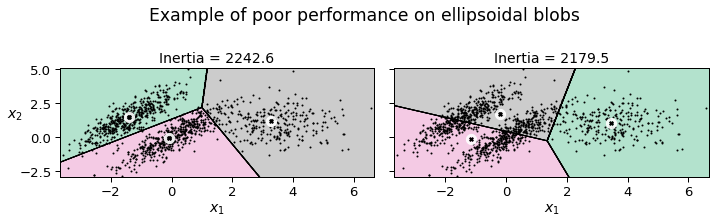

In [19]:
# from https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=5,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

        
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

#save_fig("bad_kmeans_plot")
plt.suptitle("Example of poor performance on ellipsoidal blobs")
plt.tight_layout()
plt.show()

## Hierarchical Clustering

### Advantages
- Results in an interpetable tree-based representation of the observations (dendrogram)<sup>1</sup>.
- Doesn't need the number of clusters to be pre-specified.
- Agglomerative clustering is generally stable across runs and the dendrogram shows how it varies over parameter choices<sup>5</sup>.

### Disadvantages
- Relies on careful selection of dissimilarity measure<sup>1</sup>.
- Generally requires scaling to be effective<sup>1</sup>.
- Assumes a hierarchical structure to the clusters, which may be unrealistic<sup>1</sup>.
- Assumes that all the data belongs in clusters with no noise<sup>5</sup>.

__Notes__
- _"The term hierarchical refers to the fact that clusters obtained by cutting the dendrogram at a given height are necessarily nested within the clusters obtained by cutting the dendrogram at any greater height. However, on an arbitrary data set, this assumption of hierarchical structure might be unrealistic. For instance, suppose that our observations correspond to a group of people with a 50–50 split of males and females, evenly split among Americans, Japanese, and French. We can imagine a scenario in which the best division into two groups might split these people by gender, and the best division into three groups might split them by nationality. In this case, the true clusters are not nested, in the sense that the best division into three groups does not result from taking the best division into two groups and splitting up one of those groups. Consequently, this situation could not be well-represented by hierarchical clustering. Due to situations such as this one, hierarchical clustering can sometimes yield worse (i.e. less accurate) results than K-means clustering for a given number of clusters."_<sup>1</sup>

__Todo__
- Use more stuff from here: https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch11/ch11.ipynb

## DBSCAN

### Advantages
- Can identify clusters of any shape<sup>2</sup>.
- Is robust to outliers<sup>2</sup>.
- Has only two hyperparameters (<code>eps</code> and <code>min_samples</code>)<sup>2</sup>.
- Can be relatively linear to compute with number of instances; $O(m \log m)$<sup>2</sup>.
    - Although can be $O(m^2)$ if <code>eps</code> is large.
- DBSCAN is generally stable across multiple runs<sup>5</sup>
    - but stability over varying <code>eps</code> and <code>min_samples</code> is not so good.

### Disadvantages
- The algorithm can be quite sensitive to <code>eps</code><sup>5</sup>.
    - It can also be hard to pick in practice.
- Performs worse with in increasing number of features
    - although the same can be said for k-means and hierarchical methods too.

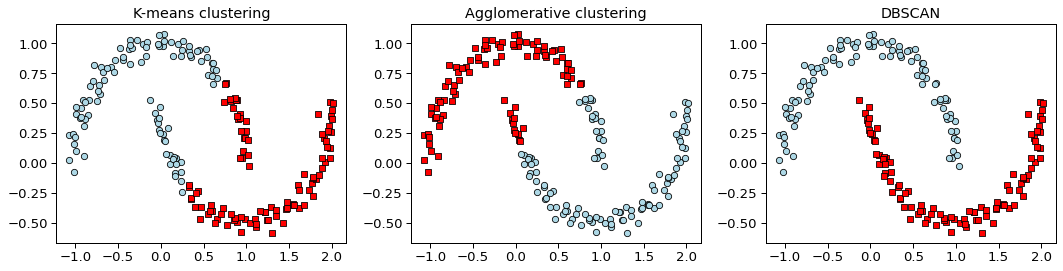

In [24]:
#https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch11/ch11.ipynb

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
ax3.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Cluster 1')
ax3.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 2')
ax3.set_title('DBSCAN')
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

# Extra
## Other Clustering Algorithms<sup>2</sup>
`Scikit-Learn` implements many more clustering algorithms so here is a brief overview:

__Affinity Propogation__

Instances vote for similar instances to represent them, with representatives and votesrs forming a cluster upon conversion.
- Can find clusters of different sizes
- Not suited for large datasets

__Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH)__

Builds a minimal tree structure to quickly assign instances to clusters without having to store them all in memory.

- Designed for large datasets
- Can be faster, with similar results, to batch k-means provided features $<20$.

__Mean-Shift__

Places a circle on each instance (the radius of the circle being a _bandwidth_ hyperparamter), calculates the mean of all instances located within the circle, then shifts the circle so it is centred on the mean. This is iterated until all circles stop moving.

- Can find clusters of any shape
- Has few hyperparameters
- Chops clusters into pieces that have internal density variations
- Not suited for large datasets

__Spectral Clustering__

Creates a low-dimensional embedding for a similarity matrix between instances, and then uses another clustering algorithm (e.g. K-means).

- Can capture complex cluster structures
- Can be used to cut graphs
- Not suited for large datasets
- Poor performance when clusters have different sizes

# References
1. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112, p. 18). New York: springer.
2. Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. O'Reilly Media.
3. https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada
4. Python ML
5. https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html

In [ ]:
import sys
from shutil import copyfile

# where the HTML template is located
dst = os.path.join(sys.prefix, 'lib', 'site-packages', 'nbconvert', 'templates', "classic.tplx")

# If its not located where it should be
if not os.path.exists(dst):
    # uses a nb_pdf_template
    curr_path = os.path.join(os.getcwd(),"..", "Extra", "classic.tplx")
    # copy where it is meant to be
    copyfile(curr_path, dst)

# Create HTML notes document
!jupyter nbconvert 3_Applications.ipynb \
    --to html \
    --output-dir . \
    --template classic
!jupyter nbconvert 3_Applications.ipynb \
    --to slides \
    --output-dir . \
    --TemplateExporter.exclude_input=True \
    --TemplateExporter.exclude_output_prompt=True \
    --SlidesExporter.reveal_scroll=True

# Create pdf notes document (issues)
!jupyter nbconvert 3_Applications.ipynb \
    --to html \
    --output-dir ./PDF_Prep \
    --output 3_Applications_no_code \
    --TemplateExporter.exclude_input=True \
    --TemplateExporter.exclude_output_prompt=True